In [205]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

https://www.kaggle.com/code/mohamedasak/social-network-ads-logistic-regression

In [206]:
# importing dataset
df = pd.read_csv('Data_sets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [207]:
df.shape

(400, 5)

In [208]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [209]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [210]:
# Splitting data into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [211]:
# Scaling is important here since age and estimated salary are on very different scales
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test= scalar.fit_transform(X_test)

In [212]:
model = LogisticRegression(random_state=0)

model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [213]:
# predicting the test set results
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [214]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.88
Recall Score:  0.9333333333333333
Precision Score:  0.7368421052631579
F1 Score:  0.8235294117647058
Confusion Matrix: 
 [[60 10]
 [ 2 28]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        70
           1       0.74      0.93      0.82        30

    accuracy                           0.88       100
   macro avg       0.85      0.90      0.87       100
weighted avg       0.90      0.88      0.88       100



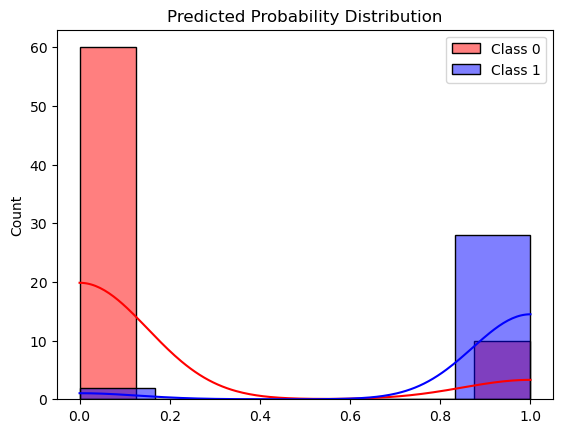

In [215]:
import seaborn as sns

sns.histplot(y_pred[y_test==0], color="red", label="Class 0", kde=True)
sns.histplot(y_pred[y_test==1], color="blue", label="Class 1", kde=True)
plt.title("Predicted Probability Distribution")
plt.legend()
plt.show()


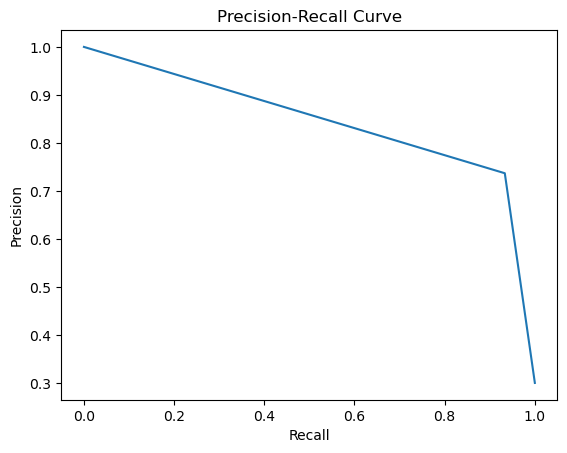

In [216]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


Text(50.722222222222214, 0.5, 'Actual')

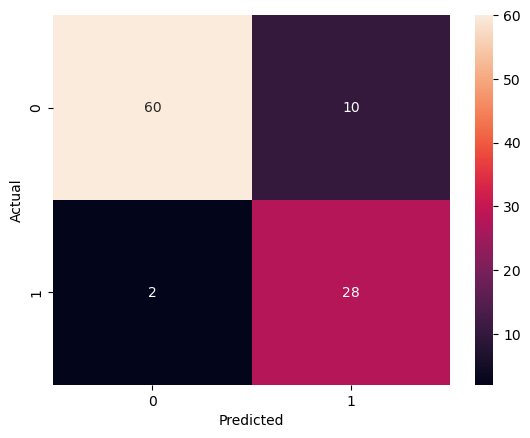

In [217]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


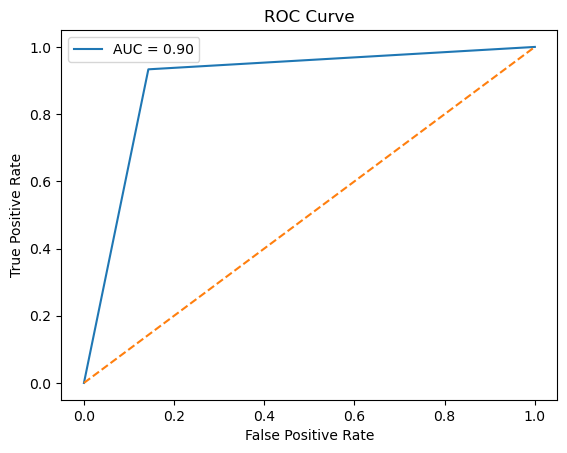

In [218]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


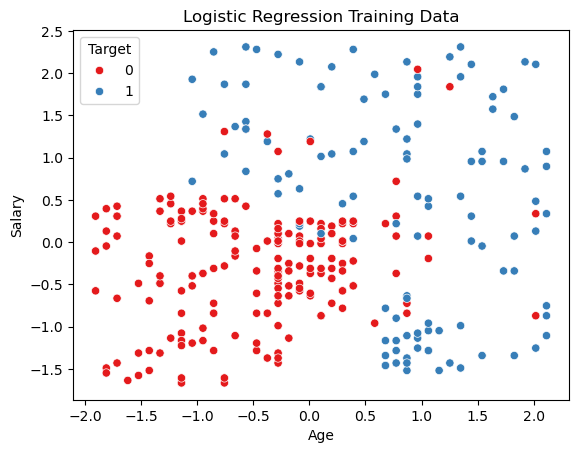

In [219]:
import seaborn as sns

df_train = pd.DataFrame(X_train, columns=["Age", "Salary"])
df_train["Target"] = y_train.values

sns.scatterplot(data=df_train, x="Age", y="Salary", hue="Target", palette="Set1")
plt.title("Logistic Regression Training Data")
plt.show()


In [220]:
# from mlxtend.plotting import plot_decision_regions
# import matplotlib.pyplot as plt

# # Model fit karo agar nahi kiya
# model.fit(X_train, y_train)

# # Plot decision boundary
# plt.figure(figsize=(8,6))
# plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

# plt.title("Logistic Regression Decision Boundary (Training Set)")
# plt.xlabel("Age")
# plt.ylabel("Estimated Salary")
# plt.show()
